In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

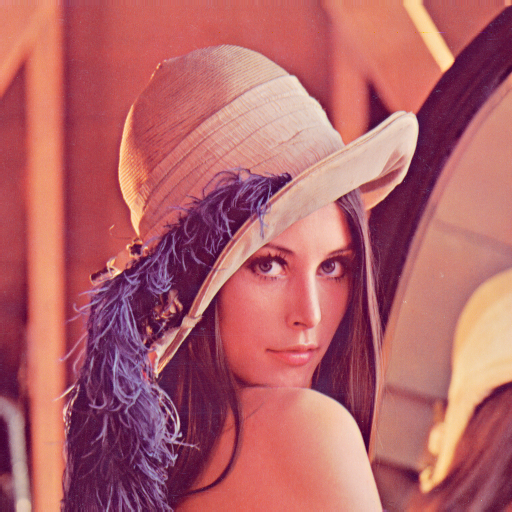

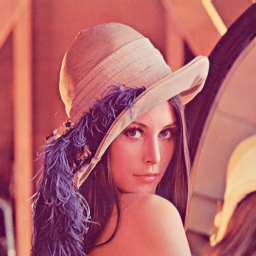

In [14]:
image = cv2.imread('lenna.png')
cv2_imshow(image)
resized = cv2.resize(image, (int(image.shape[1]/2), int(image.shape[0]/2)))
cv2_imshow(resized)

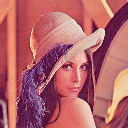

In [15]:
cv2_imshow(image[::4, ::4, :])

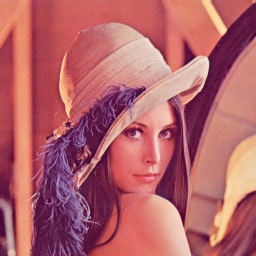

In [16]:
RI = []

for i in range(0, image.shape[0], 2):
    t = []
    for j in range(0, image.shape[1], 2):
        t2 = []
        for k in range(3):
            t2.append(np.mean(image[i:i+2, j:j+2, k]))
        t.append(t2)
    RI.append(t)




RI = np.array(RI, dtype=np.uint8)

cv2_imshow(RI)


(512, 512, 3)
(512, 512)


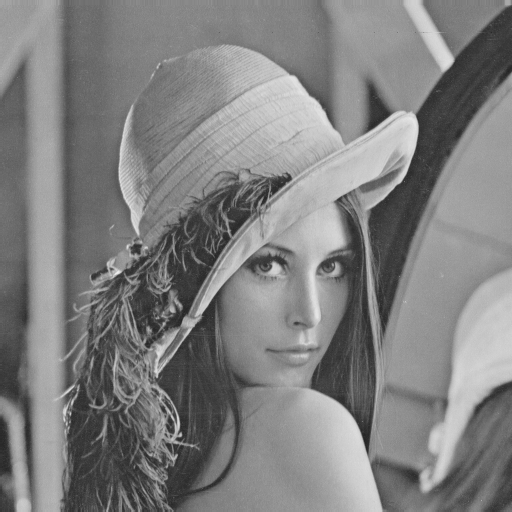

In [17]:
GI = []
print(image.shape)
for i in range(image.shape[0]):
    t = []
    for j in range(image.shape[1]):
      t.append(np.mean(image[i, j, :]))
    GI.append(t)
GI = np.array(GI, dtype=np.uint8)
print(GI.shape)
cv2_imshow(GI)


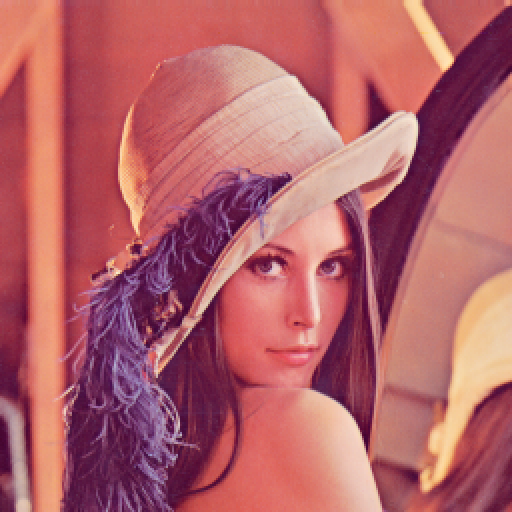

In [18]:
EI = []

for i in range(0, RI.shape[0]):
    t = []
    for j in range(0, RI.shape[1]):
        t.append(RI[i, j, :])
        t.append(RI[i, j, :])
    EI.append(t)
    EI.append(t)

EI = np.array(EI, dtype=np.uint8)

cv2_imshow(EI)

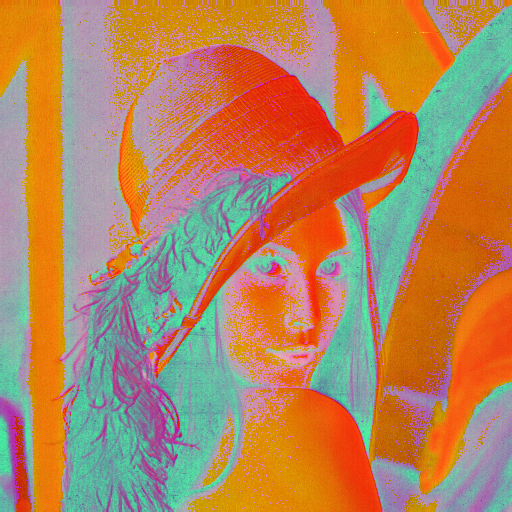

In [19]:
image_cl1 = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(image_cl1)

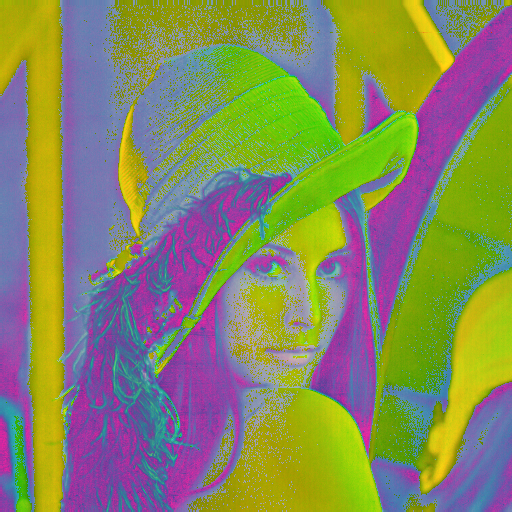

In [20]:
image_cl1 = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
cv2_imshow(image_cl1)

In [21]:
image, image.shape

(array([[[125, 137, 226],
         [125, 137, 226],
         [133, 137, 223],
         ...,
         [122, 148, 230],
         [110, 130, 221],
         [ 90,  99, 200]],
 
        [[125, 137, 226],
         [125, 137, 226],
         [133, 137, 223],
         ...,
         [122, 148, 230],
         [110, 130, 221],
         [ 90,  99, 200]],
 
        [[125, 137, 226],
         [125, 137, 226],
         [133, 137, 223],
         ...,
         [122, 148, 230],
         [110, 130, 221],
         [ 90,  99, 200]],
 
        ...,
 
        [[ 60,  18,  84],
         [ 60,  18,  84],
         [ 58,  27,  92],
         ...,
         [ 84,  73, 173],
         [ 76,  68, 172],
         [ 79,  62, 177]],
 
        [[ 57,  22,  82],
         [ 57,  22,  82],
         [ 62,  32,  96],
         ...,
         [ 79,  70, 179],
         [ 81,  71, 181],
         [ 81,  74, 185]],
 
        [[ 57,  22,  82],
         [ 57,  22,  82],
         [ 62,  32,  96],
         ...,
         [ 79,  70, 179],
  

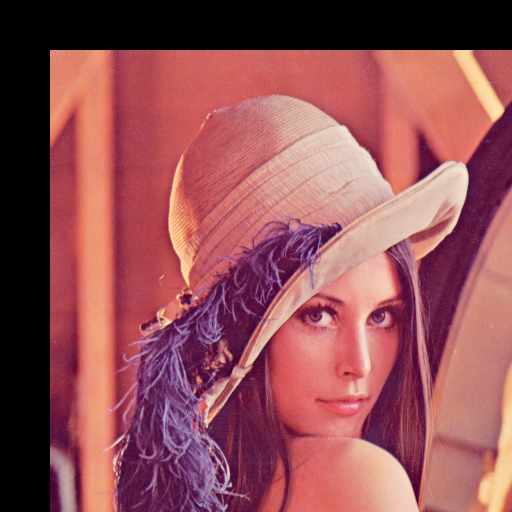

In [22]:
height, width, channels = image.shape
TI = []
for i in range(width):
    t = []
    for j in range(height):
        t1 = []
        for k in range(3):
            src_i = i - 50
            src_j = j - 50
            if 0 <= src_i < height and 0 <= src_j < width:
                t1.append(image[src_i, src_j, k])
            else:
                t1.append(0)
        t.append(t1)
    TI.append(t)

TI = np.array(TI, dtype=np.uint8)
cv2_imshow(TI)



Enter angle: 30


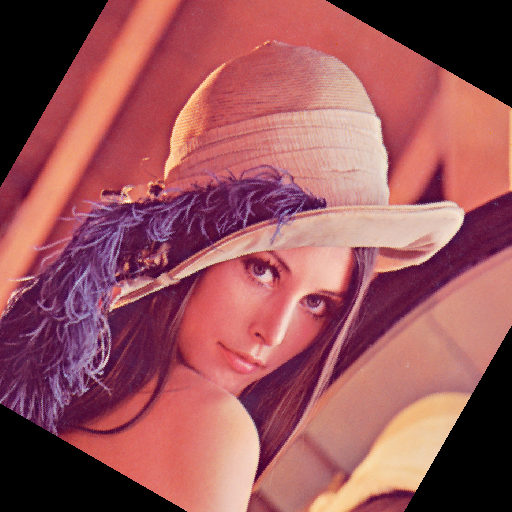

In [23]:
H, W, C = image.shape

theta = np.radians(int(input("Enter angle: ")))

cx, cy = H // 2, W // 2
#cx, cy = 0, 0
ROI = []

for i in range(H):
    t = []
    for j in range(W):
        t1 = []

        x_shifted = i - cx
        y_shifted = j - cy

        x_rot = x_shifted * np.cos(theta) - y_shifted * np.sin(theta)
        y_rot = x_shifted * np.sin(theta) + y_shifted * np.cos(theta)

        x_final = int(round(x_rot + cx))
        y_final = int(round(y_rot + cy))

        for k in range(C):
            if 0 <= x_final < H and 0 <= y_final < W:
                t1.append(image[x_final, y_final, k])
            else:
                t1.append(0)
        t.append(t1)
    ROI.append(t)

sROI = np.array(ROI, dtype=np.uint8)
cv2_imshow(sROI)

Enter shear factor s: 0.2


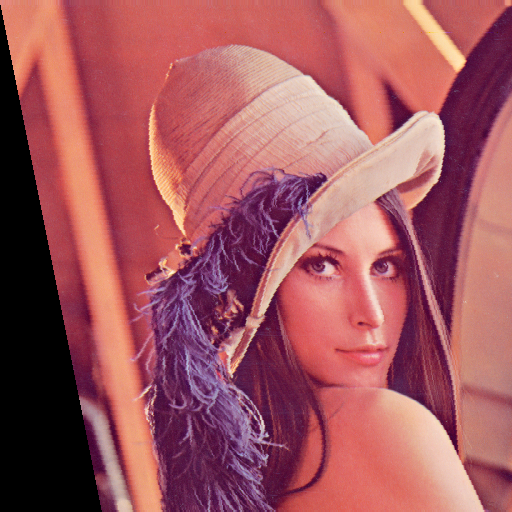

In [36]:
s = float(input("Enter shear factor s: "))

HSI = np.zeros_like(image)

for i in range(H):
    for j in range(W):
        x = i
        y = int(s*i + j)

        if 0 <= x < H and 0 <= y < W:
            HSI[x, y] = image[i, j]

cv2_imshow(HSI)

Enter shear factor s: 0.2


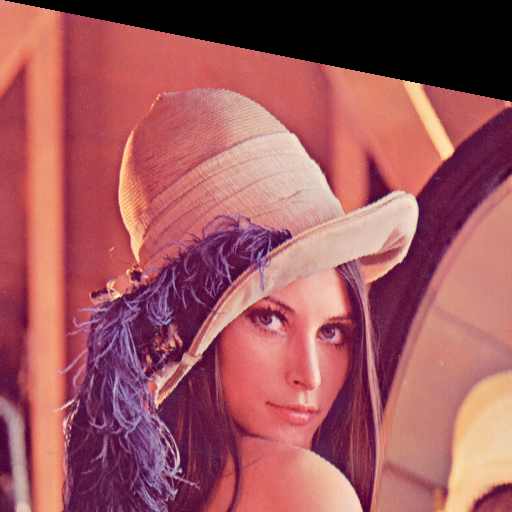

In [35]:
s = float(input("Enter shear factor s: "))

VSI = np.zeros_like(image)

for i in range(H):
    for j in range(W):
        x = int(s * j + i)
        y = j

        if 0 <= x < H and 0 <= y < W:
            VSI[x, y] = image[i, j]

cv2_imshow(VSI)